In [31]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Read in the data

df = pd.read_csv("data/chicago_crime_2019_2023.csv")

In [3]:
df.info()

# Clean data
df_cl = df.drop_duplicates()
df_cl = df_cl.dropna()

df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120322 entries, 0 to 1120321
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   unique_key      1120322 non-null  int64  
 1   date            1120322 non-null  object 
 2   block           1120322 non-null  object 
 3   primary_type    1120322 non-null  object 
 4   description     1120322 non-null  object 
 5   ward            1120274 non-null  float64
 6   community_area  1120320 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 59.8+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 1120273 entries, 0 to 1120321
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   unique_key      1120273 non-null  int64  
 1   date            1120273 non-null  object 
 2   block           1120273 non-null  object 
 3   primary_type    1120273 non-null  object 
 4   descript

In [49]:
# list all primary crime types
crime_types = df_cl.primary_type.unique()

In [5]:
df_cl.sample(10)

,unique_key,date,block,primary_type,description,ward,community_area
733190,12800671,2022-08-20 08:00:00 UTC,066XX W GRAND AVE,THEFT,$500 AND UNDER,29.0,18.0
389880,11864019,2019-10-17 06:34:00 UTC,026XX W ADAMS ST,NARCOTICS,POSS: HEROIN(WHITE),28.0,27.0
1000051,11960024,2020-01-23 08:00:00 UTC,009XX E 82ND ST,BATTERY,AGGRAVATED - HANDGUN,8.0,44.0
262726,12650275,2022-03-22 04:00:00 UTC,064XX N RIDGE BLVD,CRIMINAL DAMAGE,TO VEHICLE,50.0,2.0
1072252,12475863,2021-09-08 03:21:00 UTC,075XX N ASHLAND AVE,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,49.0,1.0
773004,12252289,2020-12-23 05:15:00 UTC,030XX N BROADWAY,THEFT,POCKET-PICKING,44.0,6.0
566996,12962414,2023-01-24 12:00:00 UTC,046XX N SHERIDAN RD,THEFT,OVER $500,46.0,3.0
911735,12353127,2021-04-30 01:00:00 UTC,009XX S WESTERN AVE,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,28.0,28.0
280941,13065144,2023-05-07 04:45:00 UTC,034XX W MEDILL AVE,CRIMINAL DAMAGE,TO PROPERTY,35.0,22.0
670005,12285806,2021-02-03 01:05:00 UTC,078XX S PAULINA ST,CRIMINAL DAMAGE,TO PROPERTY,17.0,71.0


In [6]:
# Convert timestamp to date 
df_cl["date"] = pd.to_datetime(df_cl["date"])
# set index to date
df_cl = df_cl.set_index("date")
# insert year instead of date
df_cl["year"] =  df_cl.index.year

In [111]:
df_cl_year = df_cl.groupby(["year", "primary_type"])
df_crime_counts = df_cl_year.agg(count=("primary_type", "count")).unstack(fill_value=0)
df_crime_counts.sample(5)

count                                                             \
primary_type ARSON ASSAULT BATTERY BURGLARY CONCEALED CARRY LICENSE VIOLATION   
year                                                                            
2020           588   18252   41510     8758                               148   
2021           529   20343   40459     6659                               169   
2022           422   20800   40921     7594                               176   
2023           388   17377   34043     5593                               158   
2019           376   20618   49514     9638                               217   

                                                                          \
primary_type CRIM SEXUAL ASSAULT CRIMINAL DAMAGE CRIMINAL SEXUAL ASSAULT   
year                                                                       
2020                          75           24876                    1167   
2021                           0           25093                    1500   
2022                           0           27240                    1562   
2023                           0           23043                    1222   
2019                         908           26681                     751   

                                                   ...                \
primary_type CRIMINAL TRESPASS DECEPTIVE PRACTICE  ... OTHER OFFENSE   
year                                               ...                 
2020                      4176              18328  ...         12592   
2021                      3406              17466  ...         13945   
2022                      4224              16481  ...         14568   
2023                      3582              12326  ...         11788   
2019                      6819              19060  ...         16794   

                                                                             \
primary_type PROSTITUTION PUBLIC INDECENCY PUBLIC PEACE VIOLATION RITUALISM   
year                                                                          
2020                  277                9                   1271         1   
2021                   95                4                    603         0   
2022                  283                5                    711         0   
2023                  194                3                    661         0   
2019                  681               11                   1520         0   

                                                                    
primary_type ROBBERY SEX OFFENSE STALKING  THEFT WEAPONS VIOLATION  
year                                                                
2020            7855         963      203  41323              8432  
2021            7917        1095      370  40802              8980  
2022            8964        1220      447  54832              8774  
2023            8079        1032      387  42900              6860  
2019            7995        1370      227  62490              6338  

[5 rows x 33 columns]

In [123]:
df_top_three = pd.DataFrame(df_crime_counts["count"][["THEFT", "BATTERY", "CRIMINAL DAMAGE"]])
df_crime_cl = pd.DataFrame(df_crime_counts["count"][crime_types])
# Merge two categories - "CRIM SEXUAL ASSAULT" and "CRIMINAL SEXUAL ASSAULT"
df_crime_cl["CRIMINAL SEXUAL ASSAULT"] = df_crime_cl["CRIM SEXUAL ASSAULT"] + df_crime_cl["CRIMINAL SEXUAL ASSAULT"]
df_crime_cl.drop(columns = "CRIM SEXUAL ASSAULT", inplace = True)
# update crime types
crime_types = df_crime_cl.columns

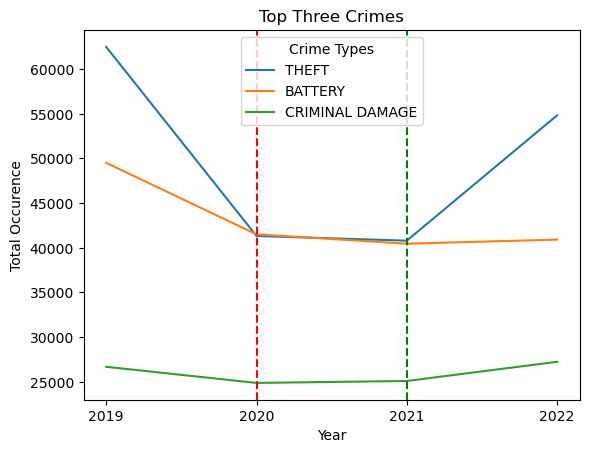

In [44]:
df_top_three_pandemic = df_top_three.loc[2019:2022]
plot = df_top_three_pandemic.plot(xticks = range(2019,2023), 
                                  xlabel = "Year", 
                                  ylabel = "Total Occurence",
                                  title = "Top Three Crimes")
plot.axvline(2020, color = "red", linestyle = "dashed")
plot.axvline(2021, color = "green", linestyle = "dashed")
plot = plot.legend(title='Crime Types')



In [124]:
years = [2020, 2021, 2022]
rows = []

for type in crime_types:
    change = df_crime_cl[type].pct_change(periods=1) * 100 
    row = []
    for year in years:
        row.append(round(change.loc[year], 2))
    rows.append(row)
 

In [125]:
change_df = pd.DataFrame(rows, index = crime_types, columns = years)

In [126]:
change_df

,2020,2021,2022
primary_type,,,
CRIMINAL SEXUAL ASSAULT,-25.14,20.77,4.13
ROBBERY,-1.75,0.79,13.22
PUBLIC PEACE VIOLATION,-16.38,-52.56,17.91
WEAPONS VIOLATION,33.04,6.50,-2.29
PROSTITUTION,-59.32,-65.70,197.89
SEX OFFENSE,-29.71,13.71,11.42
OFFENSE INVOLVING CHILDREN,-18.03,-3.76,-2.60
NARCOTICS,-50.31,-28.76,-11.37
INTERFERENCE WITH PUBLIC OFFICER,-57.70,-51.99,25.16


In [133]:
#clean up
change_df.dropna(inplace=True)
# get the crime categories with the highest increase in 2020
change_df.sort_values(2020, inplace=True, ascending = False)
change_df.head(3)

,2020,2021,2022
primary_type,,,
HOMICIDE,56.69,1.76,-10.37
ARSON,56.38,-10.03,-20.23
WEAPONS VIOLATION,33.04,6.50,-2.29


In [135]:
change_df.sort_values(2021, inplace=True, ascending = False)
change_df.head(10)

,2020,2021,2022
primary_type,,,
NON-CRIMINAL,-66.67,300.00,25.00
STALKING,-10.57,82.27,20.81
HUMAN TRAFFICKING,-66.67,80.00,88.89
LIQUOR LAW VIOLATION,-38.36,28.67,10.33
CRIMINAL SEXUAL ASSAULT,-25.14,20.77,4.13
CONCEALED CARRY LICENSE VIOLATION,-31.80,14.19,4.14
SEX OFFENSE,-29.71,13.71,11.42
ASSAULT,-11.48,11.46,2.25
OTHER OFFENSE,-25.02,10.74,4.47


In [136]:
change_df.sort_values(2022, inplace=True, ascending = False)
change_df.head(10)

,2020,2021,2022
primary_type,,,
OTHER NARCOTIC VIOLATION,-25.00,-66.67,250.00
PROSTITUTION,-59.32,-65.70,197.89
MOTOR VEHICLE THEFT,10.94,6.47,102.26
HUMAN TRAFFICKING,-66.67,80.00,88.89
INTIMIDATION,0.00,-24.54,49.59
KIDNAPPING,-30.64,-27.50,34.48
THEFT,-33.87,-1.26,34.39
INTERFERENCE WITH PUBLIC OFFICER,-57.70,-51.99,25.16
PUBLIC INDECENCY,-18.18,-55.56,25.00
